## Preliminary steps
### Load the necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using MLDataUtils, Distributions

### We create a toy dataset with a noisy sinus

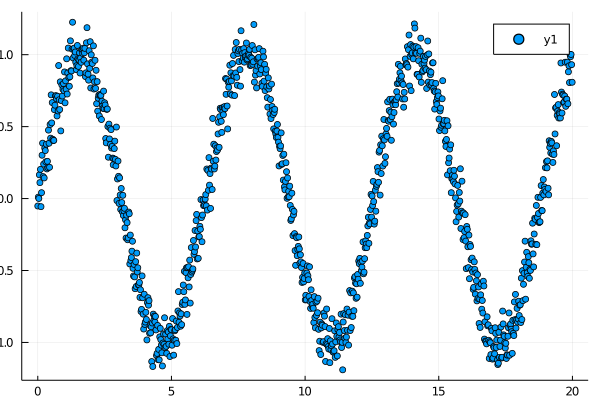

In [2]:
N = 2000
σ = 0.1
X, y = noisy_sin(N, 0, 20, noise=σ)
X = reshape(X, :, 1) # Put X as a Matrix
X_train = X[1:2:end,:]; y_train = y[1:2:end] # We split the data equally
X_test = X[2:2:end,:]; y_test = y[2:2:end]
scatter(X_train, y_train)

### Plot model at each step

In [3]:
function plot_model(model, X, X_test, X_train, y_train)
    y_pred, sig_pred = proba_y(model,X_test)
    plot(X, sin, lab="f", color=:black, lw=3.0, ylims=(-2,2))
    plot!(X_test, y_pred, ribbon=sqrt.(sig_pred), lab="Prediction", lw=3.0)
    scatter!(X_train, y_train, msw=0.0, alpha=0.5, lab="Data")
    scatter!(first.(model[1].Z), mean(model[1]), lab="IP")
end

plot_model (generic function with 1 method)

## Model training
### Create a kernel

In [4]:
k = SqExponentialKernel();

### Create an inducing point selection method

In [5]:
IP_alg = OIPS(0.8);

### Create the model and stream the data

/home/runner/.julia/packages/GR/BwGt2/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/runner/.julia/packages/GR/BwGt2/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/runner/.julia/packages/GR/BwGt2/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't conne

Plots.AnimatedGif("/tmp/jl_KRY4nK.gif")
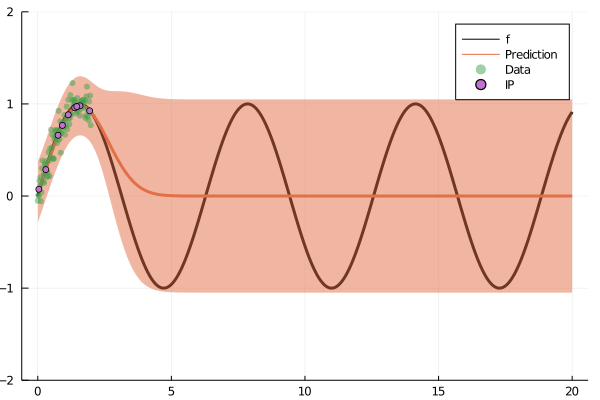

In [6]:
model = OnlineSVGP(k, GaussianLikelihood(σ), AnalyticVI(), IP_alg)
anim = Animation()
size_batch = 100
for (i, (X_batch,y_batch)) in enumerate(eachbatch((X_train,y_train), obsdim=1, size=size_batch))
    train!(model, X_batch, y_batch, iterations=3)
    plot_model(model, X, X_test, X_train[1:i * size_batch], y_train[1:i * size_batch])
    frame(anim)
end
gif(anim, fps=4)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*